## Adham Mohamed           2206132     
##### Compiling and collecting all of the algorithms into a comprehnsive Report & Data Collection.
## Amr Khaled              2206159     
##### Data Preprocessing and Exploratory Data Analysis for better understanding of the Data set.
## Loaay Salah             2206155     
##### Implementation of K-Medoids algorithm to reach conclusions and predictions for the Data.
## Mickel Wassef           22010449    
##### Implementation of K-Medoids algorithm to reach conclusions and predictions for the Data.
## Omar Moamen             2206157     
##### Implementation of Hierarchial clustering algorithm to reach conclusions and predictions for the Data.
## Abdelrahman Jayasundara 2206147     
##### Implementation of Hierarchial clustering algorithm to reach conclusions and predictions for the Data.

# Stating the problem
In the Dataset we chose there was Medical information on some people. Although the Data already had a column with the classification of whether the person is Diabetic or not, We thought we would use the learned algorithms in this course to help predict whether other people procured the disease based on the 'symptoms' or medical traits given in other columns.

Finally we measure the accuracy of these predictions (Silhouette Score) based on the already given data to check which algorithm is better for predicting the procurement of the disease for new Entries in the Dataset.

# Exploratory Data Analysis
Exploratory Data Analysis or EDA for short is alittle similar to preprocessing, but it's purpose differs. EDA is a way of understanding the Data you have on your hand. This can be done via modeling or deep data analysis and summary of data and noticing patterns and relations between different data values.

EDA performed before performing preprocessing has one main purpose. That is checking the anomalies in the data to know what you should fix in the preprocessing step.

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age               

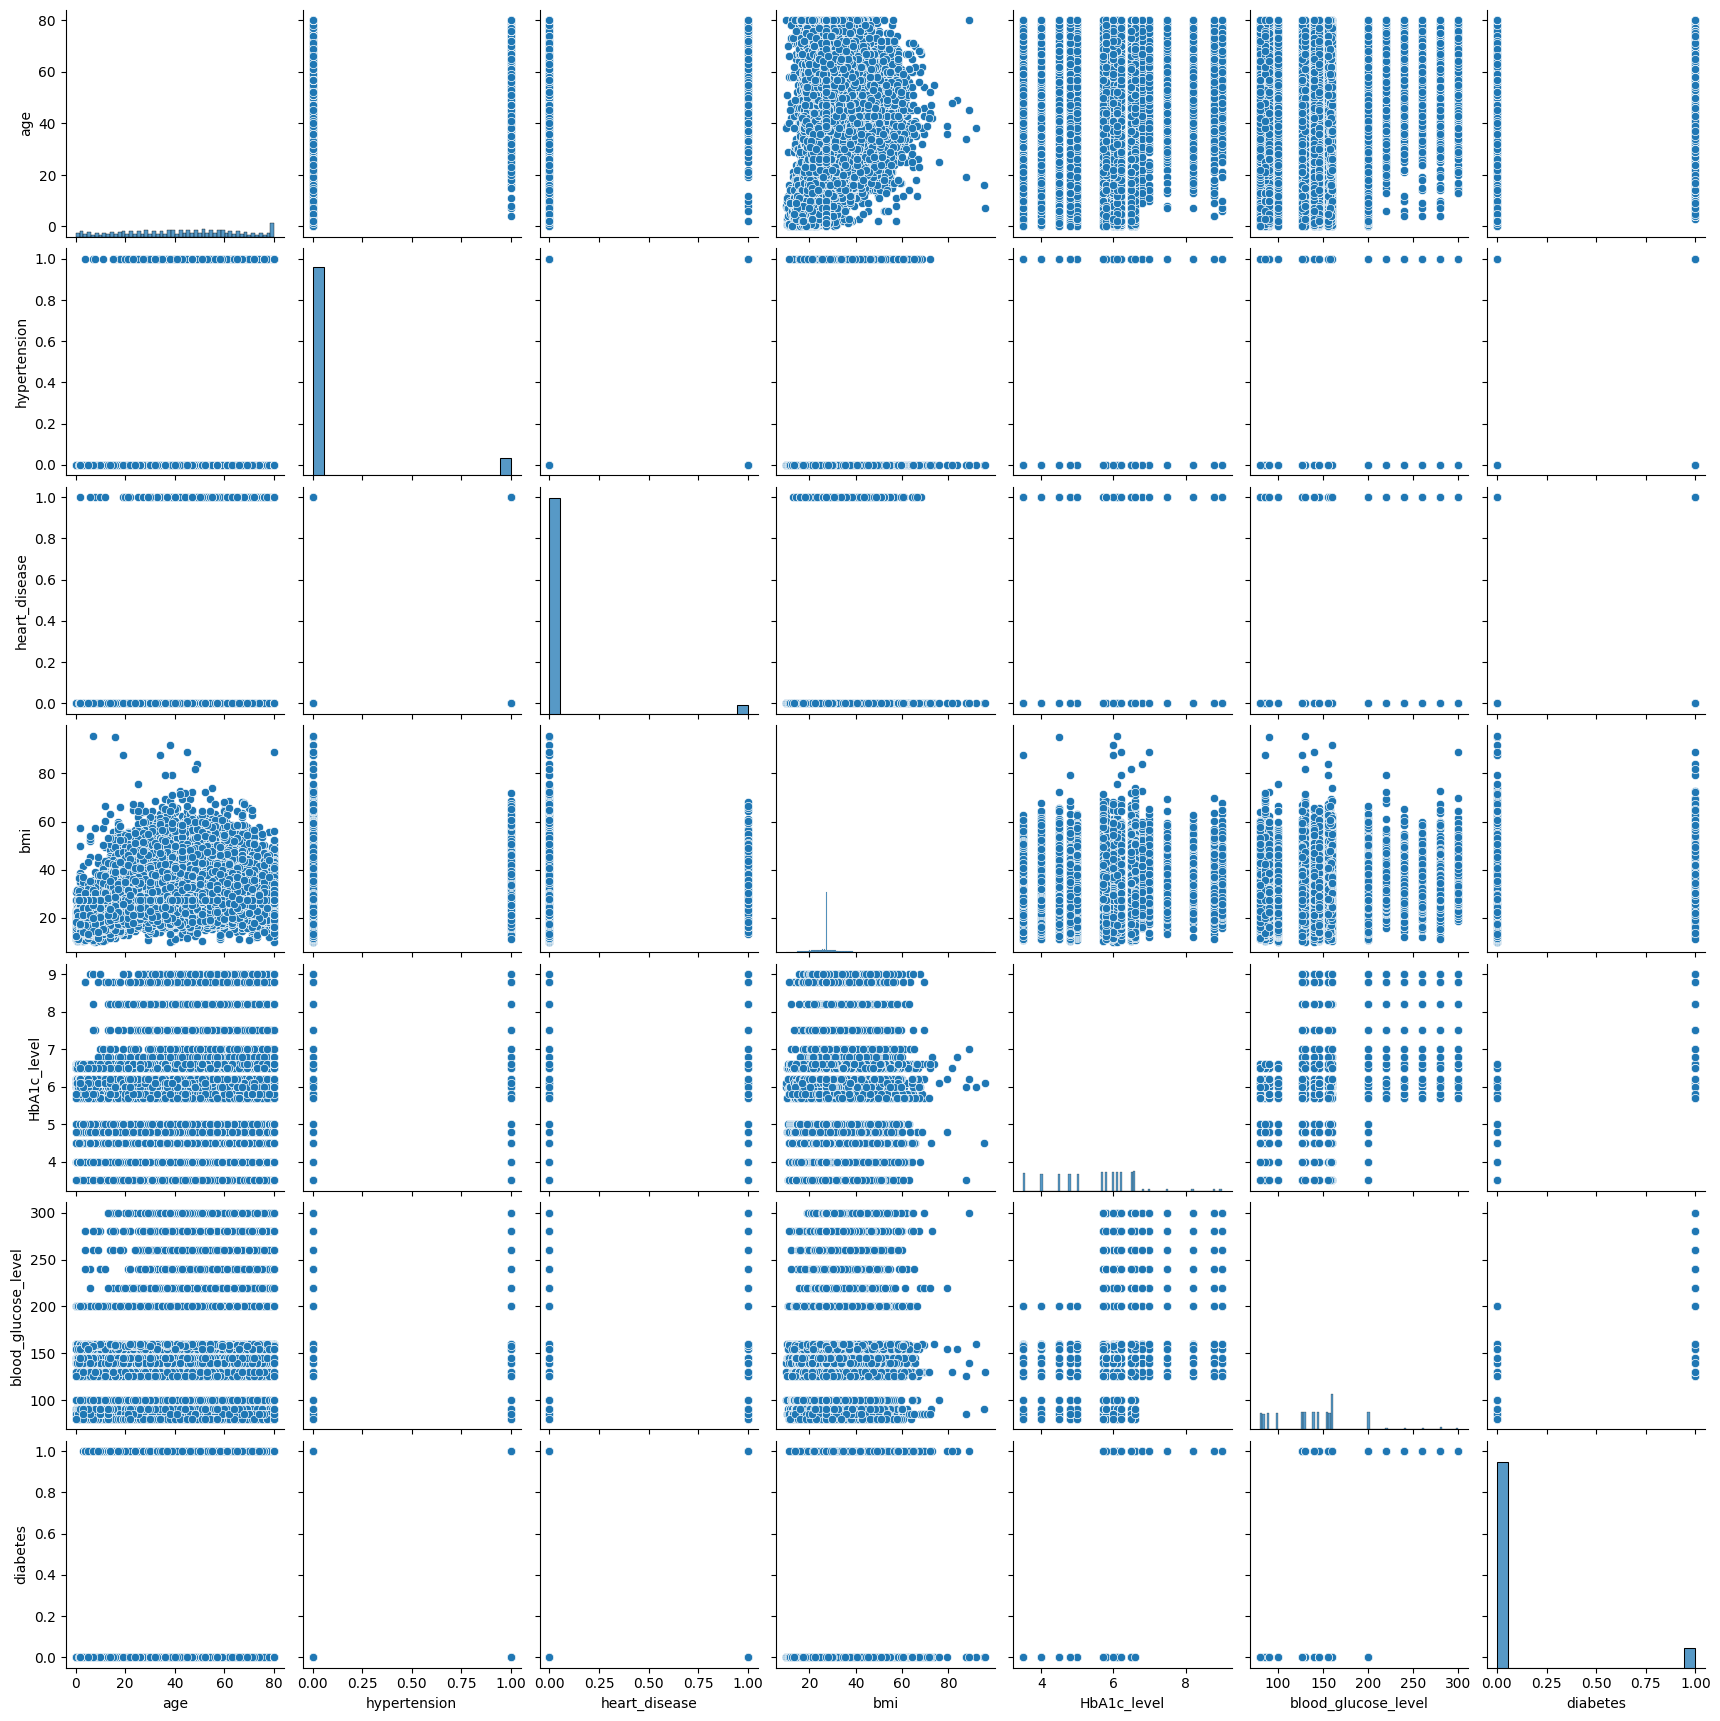

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [50]:
#Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the dataset with the CSV extension
data = pd.read_csv("diabetes_prediction_dataset.csv")

#Prints the first few records (Entries) of the Data
print(data.head())

#Prints the data type of the columns
print(data.info())

#Prints summary statistics
print(data.describe())

#Visualization and modeling of the data
sns.pairplot(data, kind='scatter')
plt.show()

#Number of the missing values (Null values)
print(data.isnull().sum())

### Categorical data analysis

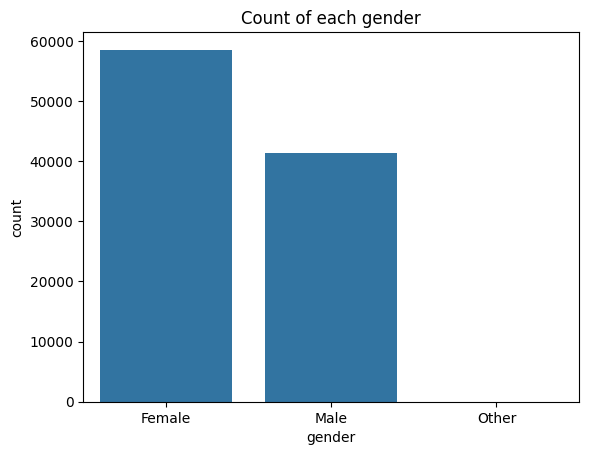

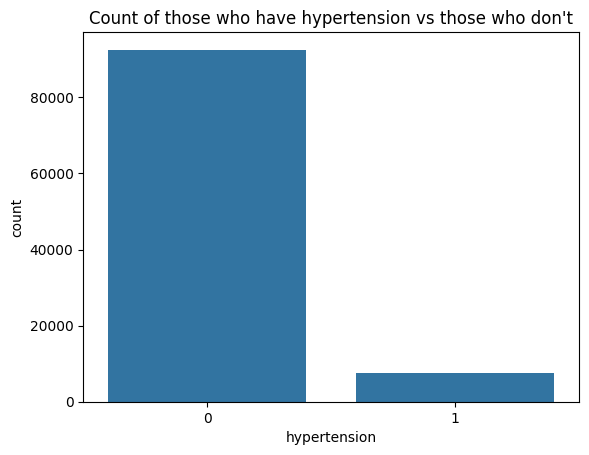

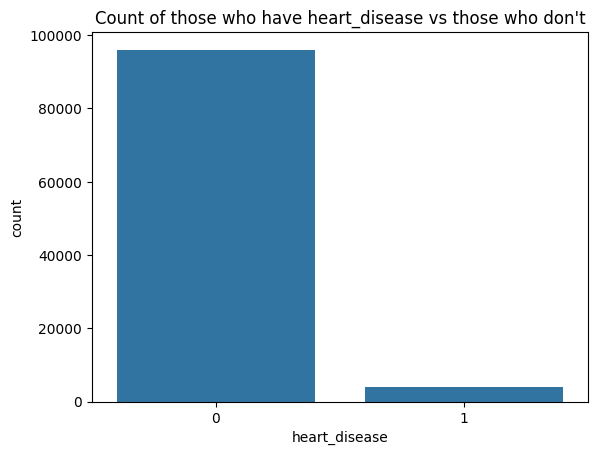

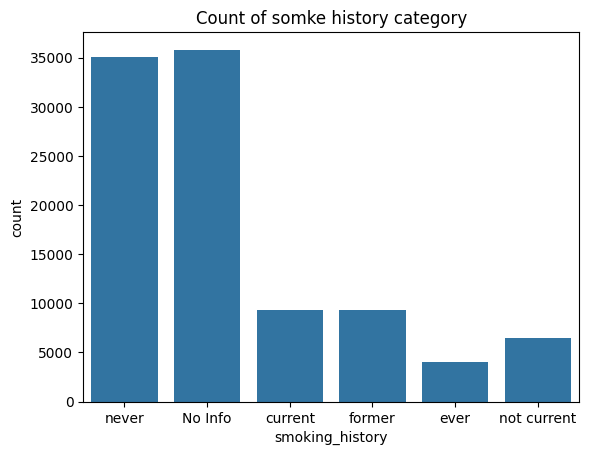

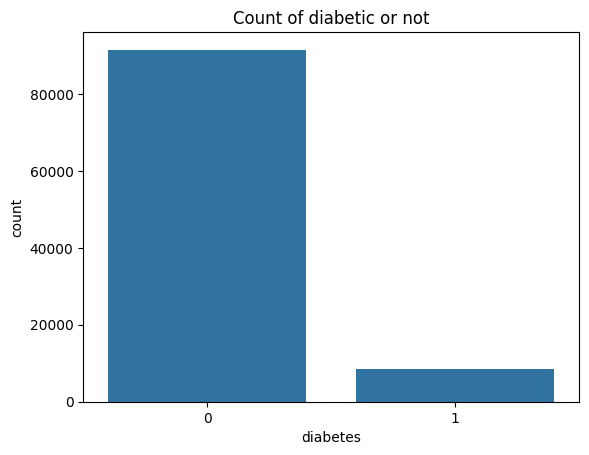

In [51]:
sns.countplot(x='gender', data=data)
plt.title('Count of each gender')
plt.show()

sns.countplot(x='hypertension', data=data)
plt.title('Count of those who have hypertension vs those who don\'t')
plt.show()

sns.countplot(x='heart_disease', data=data)
plt.title('Count of those who have heart_disease vs those who don\'t')
plt.show()

sns.countplot(x='smoking_history', data=data)
plt.title('Count of somke history category')
plt.show()

sns.countplot(x='diabetes', data=data)
plt.title('Count of diabetic or not')
plt.show()

### Cross-tabulation for pattern recognition

In [52]:
cross_tab = pd.crosstab(data['diabetes'], data['hypertension'])
print(cross_tab)

cross_tab = pd.crosstab(data['diabetes'], data['heart_disease'])
print(cross_tab)

cross_tab = pd.crosstab(data['diabetes'], data['smoking_history'])
print(cross_tab)

cross_tab = pd.crosstab(data['diabetes'], data['gender'])
print(cross_tab)

hypertension      0     1
diabetes                 
0             86103  5397
1              6412  2088
heart_disease      0     1
diabetes                  
0              88825  2675
1               7233  1267
smoking_history  No Info  current  ever  former  never  not current
diabetes                                                           
0                  34362     8338  3532    7762  31749         5757
1                   1454      948   472    1590   3346          690
gender    Female   Male  Other
diabetes                      
0          54091  37391     18
1           4461   4039      0


### Outlier Detection

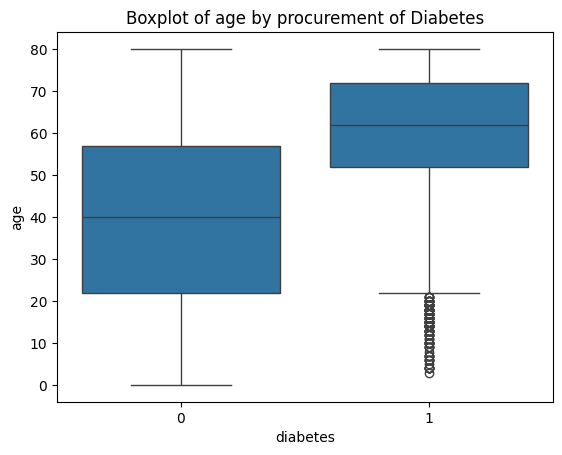

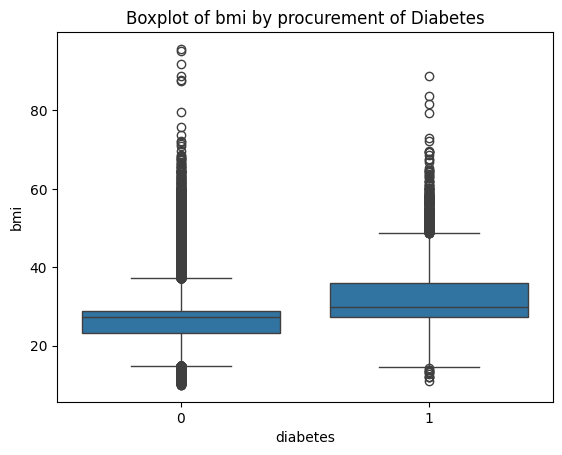

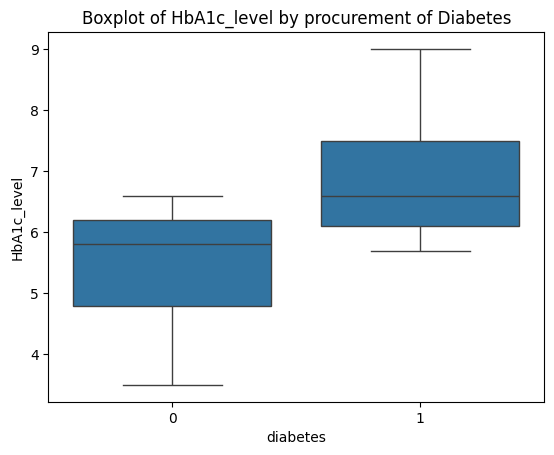

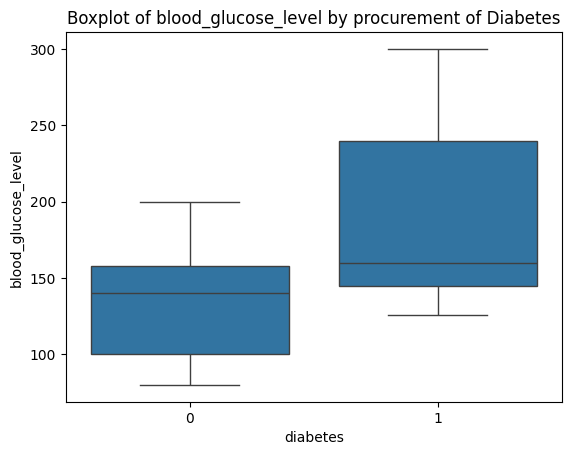

In [53]:
sns.boxplot(x='diabetes', y='age', data=data)
plt.title('Boxplot of age by procurement of Diabetes')
plt.show()

sns.boxplot(x='diabetes', y='bmi', data=data)
plt.title('Boxplot of bmi by procurement of Diabetes')
plt.show()

sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('Boxplot of HbA1c_level by procurement of Diabetes')
plt.show()

sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Boxplot of blood_glucose_level by procurement of Diabetes')
plt.show()

# Data Preprocessing
The following cells of code are to do preprocessing for the Data.

Firstly, we import the data and remove outliers using Inter-quartile Range on numerical data values.

In [54]:
#Importing the required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Importing the dataset with the CSV extension
data = pd.read_csv("diabetes_prediction_dataset.csv")

#Removing outliers using Inter-quartile Range
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cleaned = data.copy()
for col in numerical_cols:
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound[col]) & (data_cleaned[col] <= upper_bound[col])]

Then we will be using what is called one-hot encode. It is a way to encode categorical data values.
We also use Min-Max scaling and and replace the scaled numerical data with the scaled data.

In [55]:
#One-Hot encoding the categorical data
data_cleaned = data_cleaned[data_cleaned['smoking_history'] != 'No Info']
categorical_cols = ['gender', 'smoking_history']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols, dtype=int)

#Scaling numerical data values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_encoded[numerical_cols])

#Replace the original numerical columns with scaled ones
data_encoded[numerical_cols] = data_scaled

Final part of preprocessing is removing unnecessary columns, then saving the preprocessed data to a new csv file.

In [56]:
#Remove unnecessary columns
columns_to_drop = ['smoking_history_not current', 'smoking_history_never', 'smoking_history_former', 'smoking_history_ever', 'smoking_history_current','gender_Other']
data_encoded.drop(columns_to_drop, axis=1, inplace=True)

#Save preprocessed data to a new CSV file
data_encoded.to_csv("preprocessed_diabetes_dataset.csv", index=False)

# Exploratory Data Analysis
Post-preprocessing EDA is to see the changes created by preprocessing after fixing anomalies that arised in the first EDA done before the preprocessing.

        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.000000             0              1  0.440521     0.659574   
1  0.348697             0              0  0.530055     0.468085   
2  0.448898             0              0  0.367381     0.319149   
3  0.949900             1              1  0.228247     0.276596   
4  0.248497             0              0  0.530055     0.659574   

   blood_glucose_level  diabetes  gender_Female  gender_Male  
0              0.37500         0              1            0  
1              0.48750         0              0            1  
2              0.46875         0              1            0  
3              0.46875         0              0            1  
4              0.03125         0              1            0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57127 entries, 0 to 57126
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age   

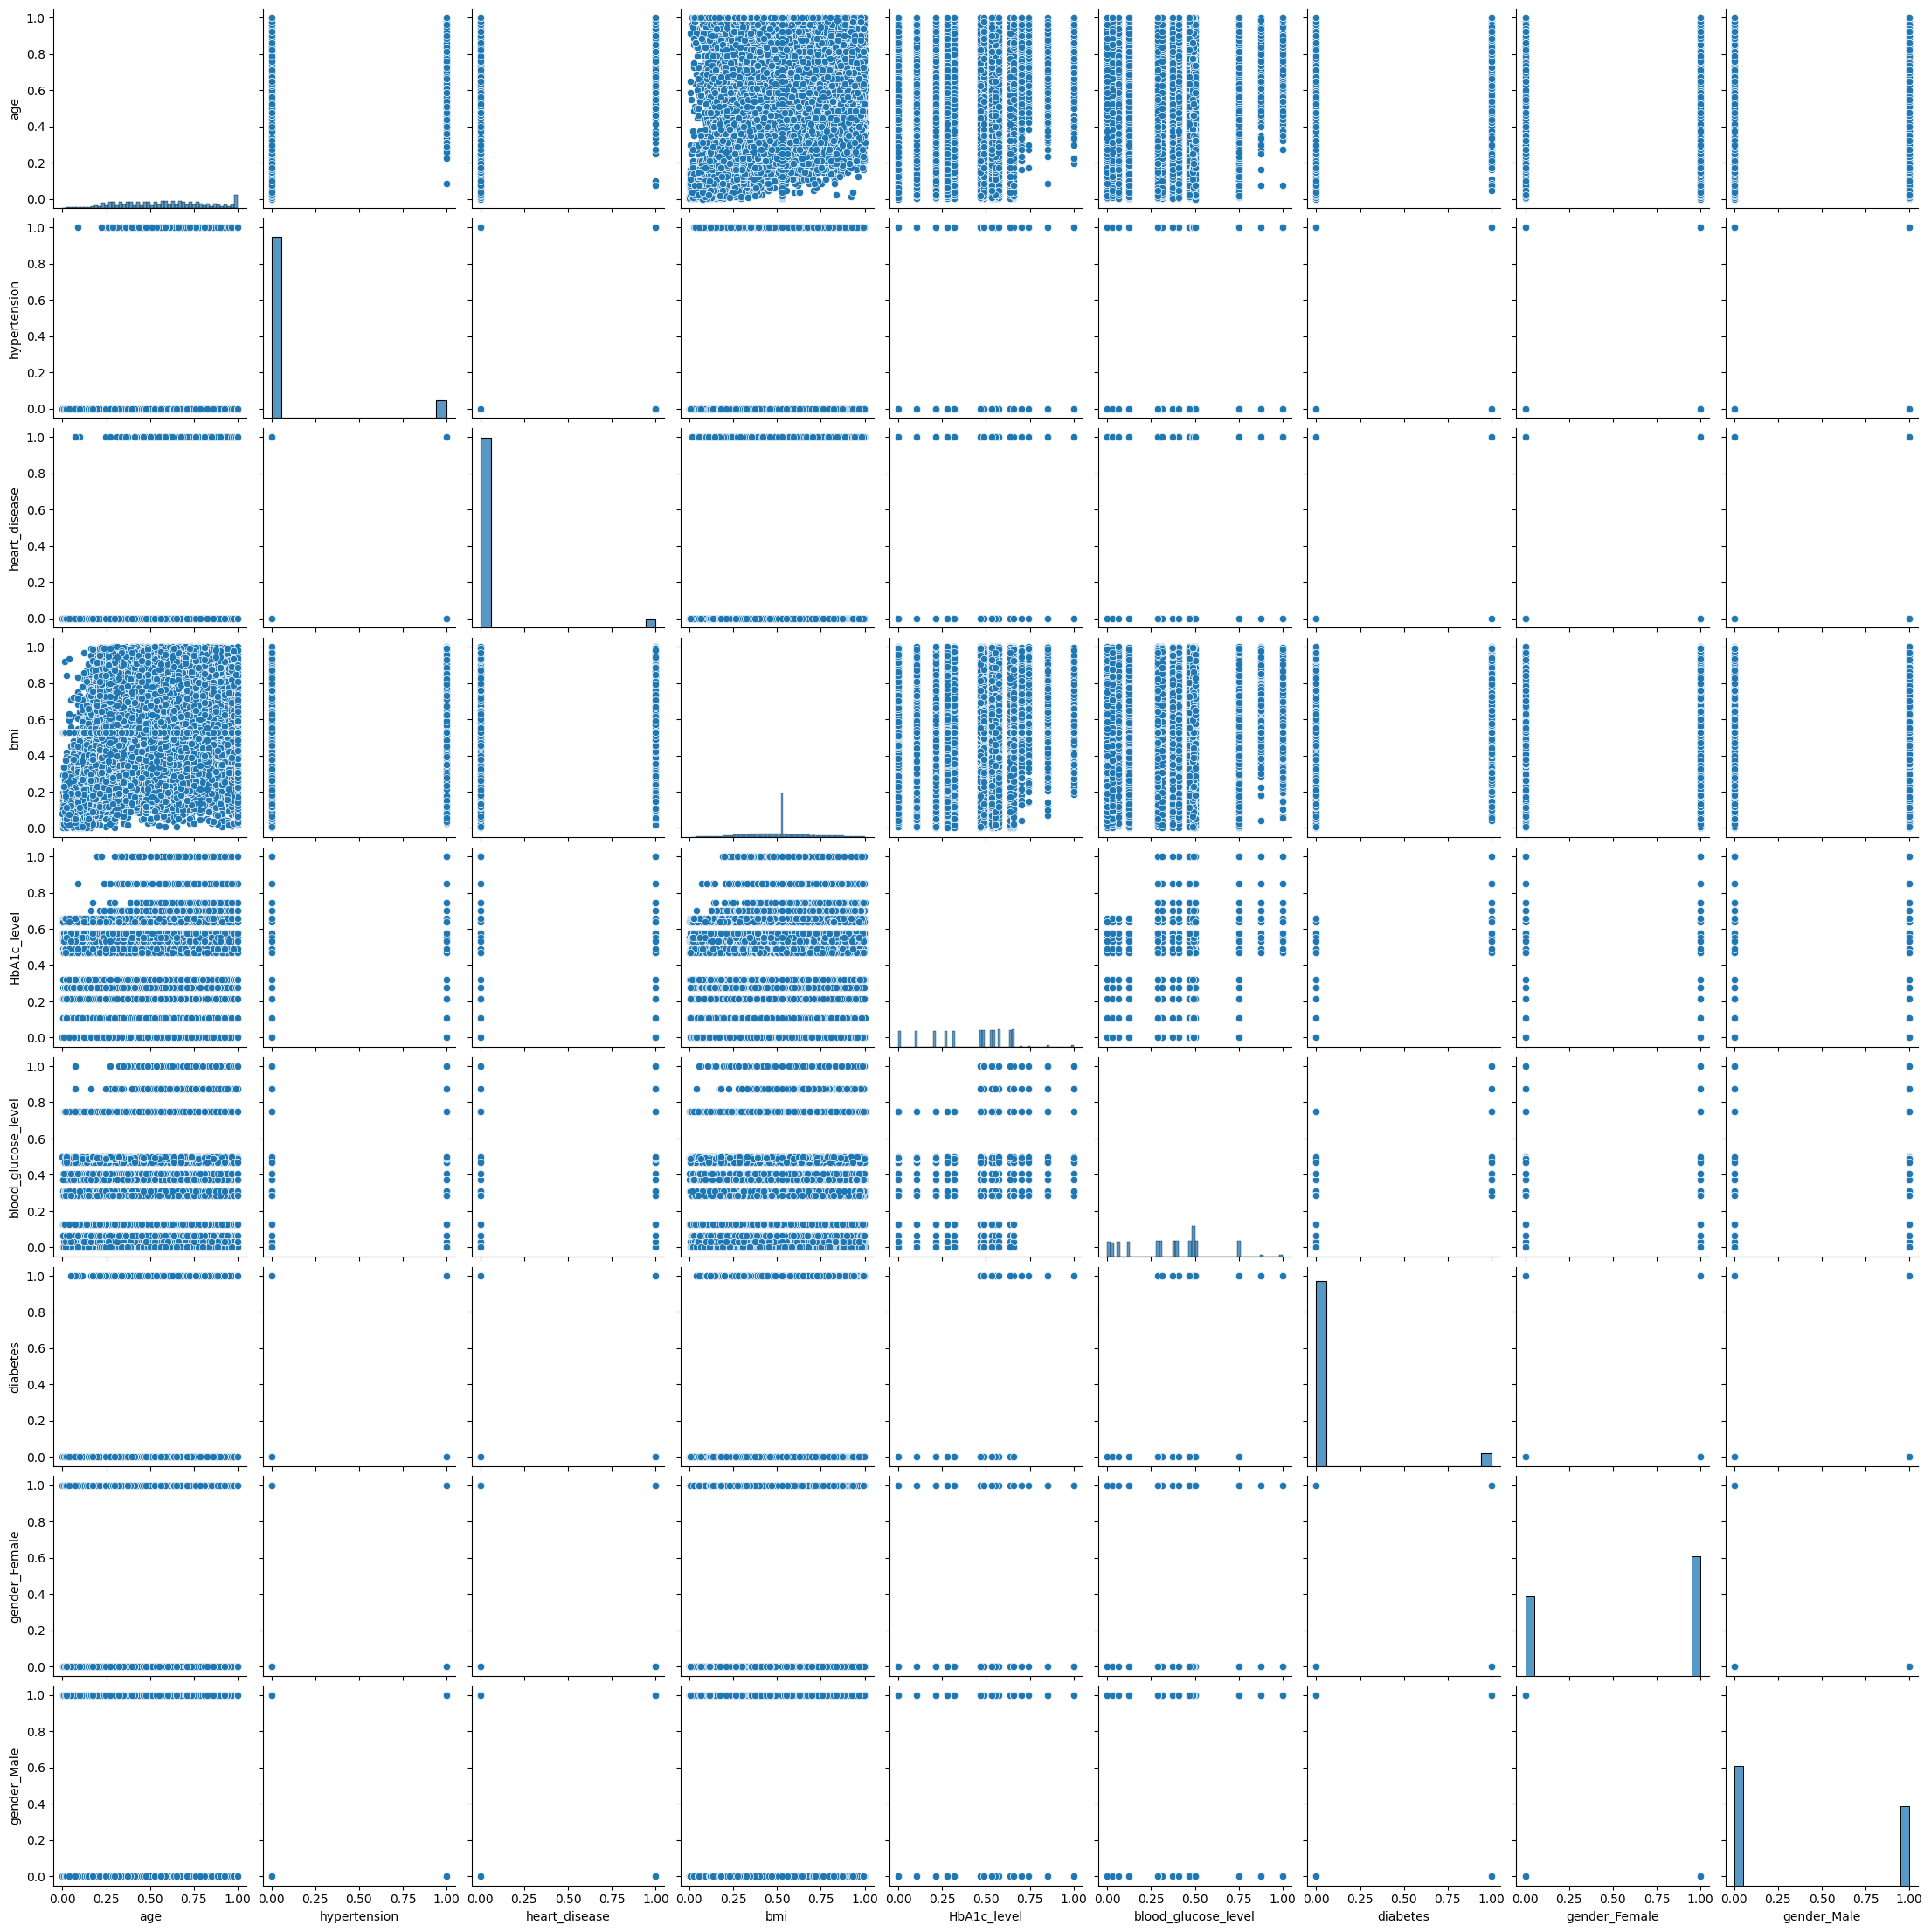

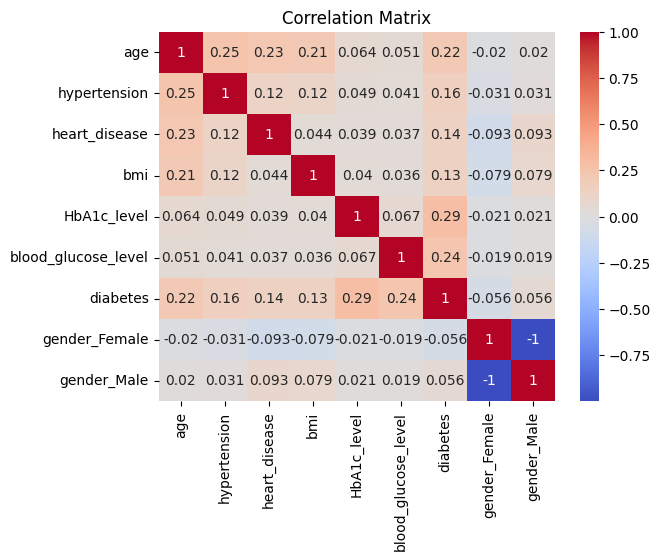

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
gender_Female          0
gender_Male            0
dtype: int64


In [57]:
#Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the data onto sns
data = pd.read_csv("preprocessed_diabetes_dataset.csv")

#Prints the first few records (Entries) of the Data
print(data.head())

#Prints the data type of the columns
print(data.info())

#Prints summary statistics
print(data.describe())

#Visualization and modeling of the data
sns.pairplot(data, kind='scatter')
plt.show()

#Correlation Analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Number of the missing values (Null values)
print(data.isnull().sum())

### Categorical data analysis

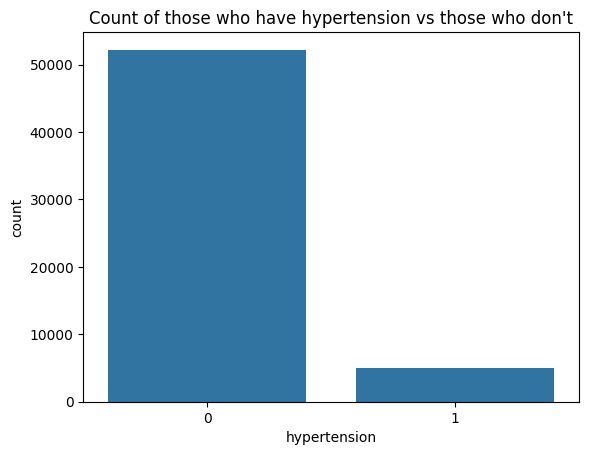

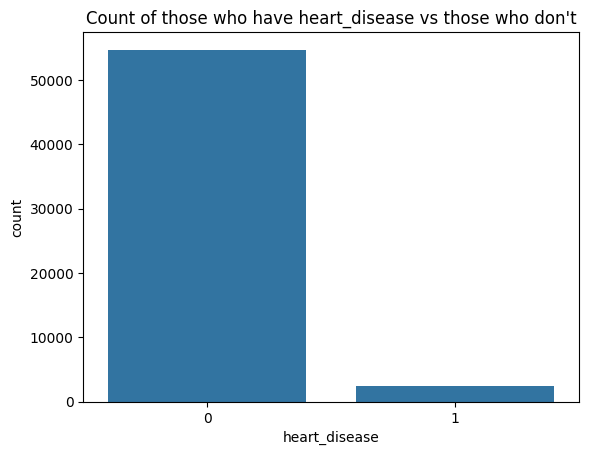

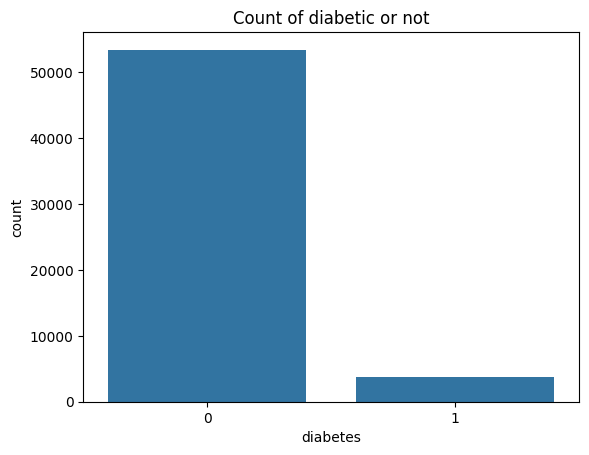

In [58]:
sns.countplot(x='hypertension', data=data)
plt.title('Count of those who have hypertension vs those who don\'t')
plt.show()

sns.countplot(x='heart_disease', data=data)
plt.title('Count of those who have heart_disease vs those who don\'t')
plt.show()

sns.countplot(x='diabetes', data=data)
plt.title('Count of diabetic or not')
plt.show()

### Cross-tabulation for pattern recognition

In [59]:
cross_tab = pd.crosstab(data['diabetes'], data['hypertension'])
print(cross_tab)

cross_tab = pd.crosstab(data['diabetes'], data['heart_disease'])
print(cross_tab)

hypertension      0     1
diabetes                 
0             49447  3976
1              2752   952
heart_disease      0     1
diabetes                  
0              51578  1845
1               3140   564


### Outlier Detection

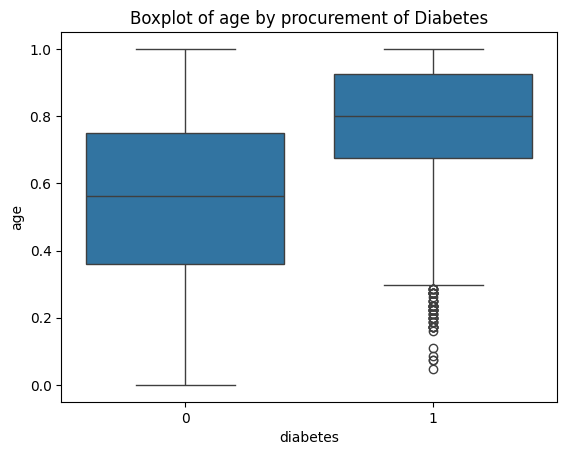

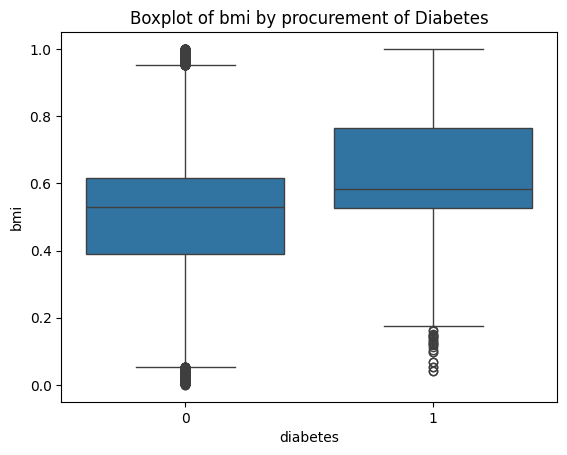

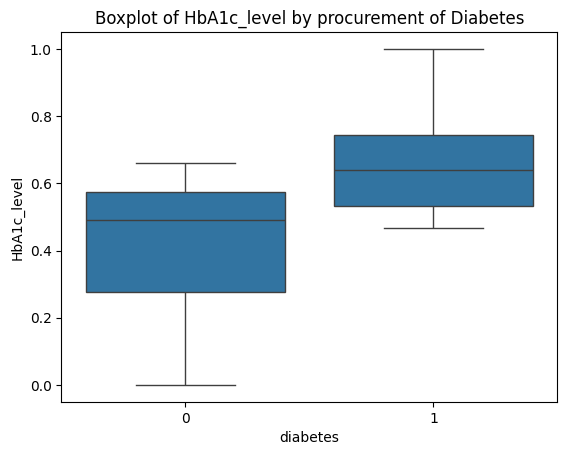

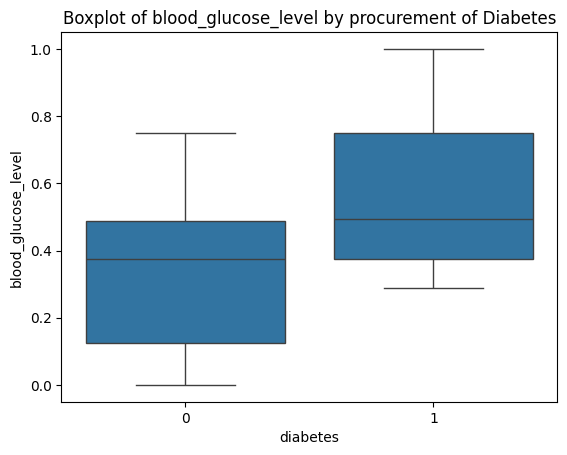

In [60]:
sns.boxplot(x='diabetes', y='age', data=data)
plt.title('Boxplot of age by procurement of Diabetes')
plt.show()

sns.boxplot(x='diabetes', y='bmi', data=data)
plt.title('Boxplot of bmi by procurement of Diabetes')
plt.show()

sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('Boxplot of HbA1c_level by procurement of Diabetes')
plt.show()

sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Boxplot of blood_glucose_level by procurement of Diabetes')
plt.show()

# KMedoids Implementation

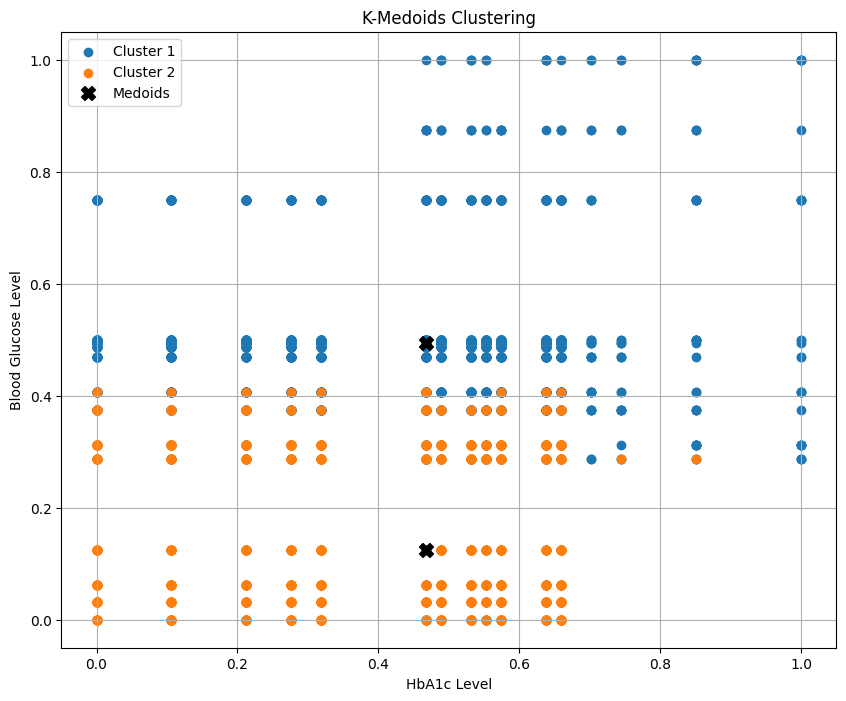

Silhouette Score: 0.3383716952159195
Centroid for Cluster 1 (Row 48247):
HbA1c Level: 0.4680851063829789, Blood Glucose Level: 0.49375
Centroid for Cluster 2 (Row 20511):
HbA1c Level: 0.4680851063829789, Blood Glucose Level: 0.125


In [61]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

#Importing the dataset with the CSV extension
data = pd.read_csv('preprocessed_diabetes_dataset.csv')

#Take a random sample 10% of the Data size
sample_size = int(0.1 * len(data))
data_sample = data.sample(n=sample_size, random_state=2)

#K-Medoids clustering with 2 clusters
kmedoids = KMedoids(n_clusters=2, random_state=2)
cluster_labels = kmedoids.fit_predict(data_sample)
cluster_labels += 1

#Add cluster labels to the sample dataframe
data_sample['Cluster'] = cluster_labels

#Get the indices of the medoids
medoid_indices = kmedoids.medoid_indices_

#Plotting all clusters together
plt.figure(figsize=(10, 8))

#Plot each cluster
for cluster_num, medoid_index in enumerate(medoid_indices):
    cluster_data = data_sample[data_sample['Cluster'] == (cluster_num + 1)]
    plt.scatter(cluster_data['HbA1c_level'], cluster_data['blood_glucose_level'], label=f'Cluster {cluster_num + 1}')

#Plot medoids
medoids = data_sample.iloc[medoid_indices]
plt.scatter(medoids['HbA1c_level'], medoids['blood_glucose_level'], c='black', marker='X', s=100, label='Medoids')

plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.title('K-Medoids Clustering')
plt.legend()
plt.grid(True)
plt.show()


#Calculate silhouette score
silhouette_avg = silhouette_score(data_sample[['HbA1c_level', 'blood_glucose_level']], cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

for cluster_num, medoid_index in enumerate(medoid_indices):
    centroid = data_sample.iloc[medoid_index]
    row_number = centroid.name  # Getting the index of the row
    print(f"Centroid for Cluster {cluster_num + 1} (Row {row_number+2}):")
    print(f"HbA1c Level: {centroid['HbA1c_level']}, Blood Glucose Level: {centroid['blood_glucose_level']}")

# Hierarchical Clustering
In implementing this algorithm we had the sample size be reduced to 0.1% to be able to show the visualiztion clearly


Silhouette Score: 0.5989959833549378


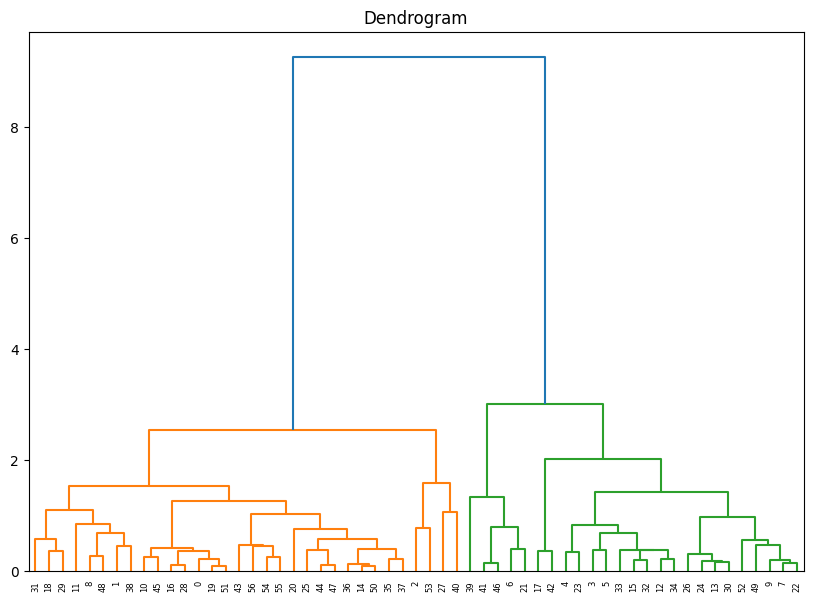

In [62]:
#Importing libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

#Importing the dataset with the CSV extension
data = pd.read_csv('preprocessed_diabetes_dataset.csv')

# Take a random sample of size 0.1%
sample_size = int(0.001 * len(data))
data_sample = data.sample(n=sample_size, random_state=2)

n_clusters = 2

# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters)
cluster_labels = agg_clustering.fit_predict(data_sample)
cluster_labels += 1
# Add cluster labels to the sample dataframe
data_sample['Cluster'] = cluster_labels

# Sort cluster counts by index (cluster number)
cluster_counts_sorted = data_sample['Cluster'].value_counts().sort_index()

data_sample.to_csv('hierarchical_clustering_algo.csv', index=False)

# Calculate silhouette score
silhouette_avg = silhouette_score(data_sample, cluster_labels)
print("\nSilhouette Score:", silhouette_avg)

# Plot dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(data_sample, method='ward'))
plt.show()